In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv('Calculate_Word_Count_Total_Wait_Time.csv')
df.describe()

,Age,Word_Count_CTD,Total_Wait_Time_CTD,Word_Count_PFT,Total_Wait_Time_PFT,Word_Count_SFT,Total_Wait_Time_SFT,Converted-MMSE
count,157.00000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,69.000000
mean,65.77707,157.433121,7.917197,32.694268,26.509554,49.292994,18.254777,27.362319
std,12.29634,91.043120,8.103467,15.931610,10.884368,21.727998,9.684712,2.467262
min,23.00000,12.000000,0.000000,8.000000,4.000000,16.000000,1.000000,19.000000
25%,62.00000,90.000000,2.000000,21.000000,18.000000,33.000000,12.000000,27.000000
50%,66.00000,135.000000,5.000000,30.000000,26.000000,45.000000,17.000000,28.000000
75%,72.00000,200.000000,11.000000,41.000000,35.000000,61.000000,24.000000,29.000000
max,94.00000,461.000000,39.000000,89.000000,51.000000,120.000000,46.000000,30.000000


## Calculate Z-Scores

In [17]:
def calculate_z_scores(df, columns):
    """
    Calculate Z-Score and add computed Z-Score as new column.
    """
    for column in columns:
        if column in df.columns:
            mean = df[column].mean()
            std = df[column].std()
            if std > 0:
                df[f'{column}_Z-Score'] = (df[column] - mean) / std
            else:
                df[f'{column}_Z-Score'] = 0  # Falls die Standardabweichung 0 ist
    return df

In [18]:
# Select columns for Z-Score calculation
numerical_columns = [ "Age",
    "Word_Count_CTD", "Total_Wait_Time_CTD", "Word_Count_PFT", "Total_Wait_Time_PFT", "Word_Count_SFT", "Total_Wait_Time_SFT",
    "Converted-MMSE" ]

# Compute Z-Score for relevant numerical columns
results_df = calculate_z_scores(df, numerical_columns)

# Select columns with Z-Scores and meta data
final_columns = [ "Record-ID", "TrainOrDev", "Class", "Gender",
    "Age_Z-Score", "Word_Count_CTD_Z-Score", "Total_Wait_Time_CTD_Z-Score", "Word_Count_PFT_Z-Score", "Total_Wait_Time_PFT_Z-Score",
    "Word_Count_SFT_Z-Score", "Total_Wait_Time_SFT_Z-Score", "Converted-MMSE_Z-Score" ]

results_df = results_df[final_columns]
results_df

,Record-ID,TrainOrDev,Class,Gender,Age_Z-Score,Word_Count_CTD_Z-Score,Total_Wait_Time_CTD_Z-Score,Word_Count_PFT_Z-Score,Total_Wait_Time_PFT_Z-Score,Word_Count_SFT_Z-Score,Total_Wait_Time_SFT_Z-Score,Converted-MMSE_Z-Score
0,Process-rec-001,train,MCI,male,-0.307170,0.577384,-0.606802,-0.169115,-0.322440,-1.210097,1.419270,-0.957466
1,Process-rec-002,dev,MCI,male,-0.388495,-0.971332,0.750642,-1.047871,0.504434,-1.118050,1.419270,-0.957466
2,Process-rec-003,train,MCI,female,-0.307170,-0.158531,-0.606802,0.144727,-0.781814,-0.289626,0.076948,0.663765
3,Process-rec-004,dev,MCI,female,0.099455,0.039178,-0.730206,0.207495,-0.598065,-0.381673,0.076948,0.663765
4,Process-rec-005,train,MCI,male,-0.063195,-1.234944,-0.977014,0.521337,-1.241189,0.584822,-1.678395,-0.146851
...,...,...,...,...,...,...,...,...,...,...,...,...
152,Process-rec-153,train,HC,male,-0.225845,-0.499029,-0.977014,3.283142,-1.884313,2.241670,-1.058862,0.258457
153,Process-rec-154,train,HC,female,1.075355,0.709190,-0.483398,0.835178,-0.965564,1.321199,-0.955607,1.069072
154,Process-rec-155,train,HC,male,1.644630,-0.729689,-0.977014,2.278849,-0.230565,-0.105532,0.180204,0.663765
155,Process-rec-156,train,Dementia,male,-0.388495,-1.201992,0.997450,-0.734029,1.515058,-1.026003,2.038803,-0.552158


## Analyze Z-Scores

In [19]:
# Get a overview of data types
df_info = { "data_types.csv": results_df.dtypes }
df_info

{'data_types.csv': Record-ID                       object
 TrainOrDev                      object
 Class                           object
 Gender                          object
 Age_Z-Score                    float64
 Word_Count_CTD_Z-Score         float64
 Total_Wait_Time_CTD_Z-Score    float64
 Word_Count_PFT_Z-Score         float64
 Total_Wait_Time_PFT_Z-Score    float64
 Word_Count_SFT_Z-Score         float64
 Total_Wait_Time_SFT_Z-Score    float64
 Converted-MMSE_Z-Score         float64
 dtype: object}

In [20]:
# Select numerical columns for correlation analysis
numeric_columns = results_df.select_dtypes(include = ['float64']).columns
correlation_matrix = results_df[numeric_columns].corr()

# Correlate numerical columns with Converted-MMSE
mmse_correlation = correlation_matrix['Converted-MMSE_Z-Score'].sort_values(ascending = False)
mmse_correlation

Converted-MMSE_Z-Score         1.000000
Word_Count_CTD_Z-Score         0.194882
Word_Count_SFT_Z-Score         0.004747
Total_Wait_Time_PFT_Z-Score   -0.176075
Word_Count_PFT_Z-Score        -0.231698
Total_Wait_Time_SFT_Z-Score   -0.284651
Age_Z-Score                   -0.335210
Total_Wait_Time_CTD_Z-Score   -0.369492
Name: Converted-MMSE_Z-Score, dtype: float64

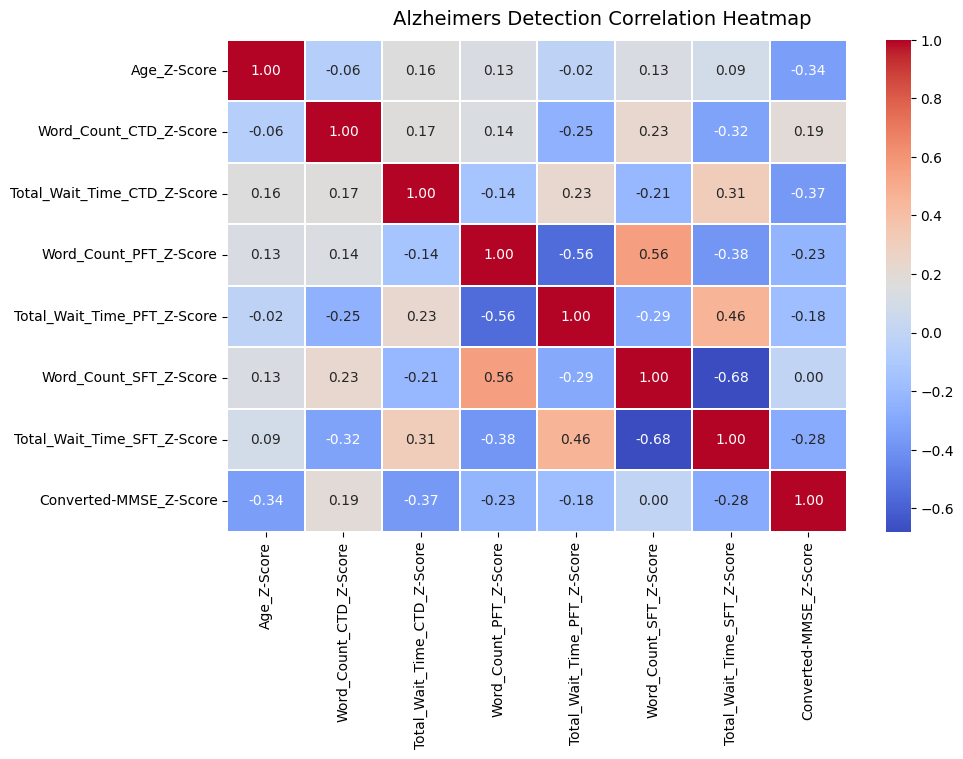

In [21]:
# Pair-wise Correlation Matrix Heatmap
f, ax = plt.subplots(figsize = (10, 6))
corr = results_df.corr(numeric_only = True)
hm = sns.heatmap(round(corr, 2), annot = True, ax = ax, cmap = "coolwarm", fmt = '.2f', linewidths = .05)
f.subplots_adjust(top = 0.93)
t = f.suptitle('Alzheimers Detection Correlation Heatmap', fontsize = 14)

## Data preparation

In [22]:
# Select features with significant correlations
features = ['Word_Count_PFT_Z-Score', 'Word_Count_SFT_Z-Score', 'Total_Wait_Time_PFT_Z-Score', 'Word_Count_PFT_Z-Score']

# Selct data without missing values (for training)
train_data = results_df.dropna(subset = ['Converted-MMSE_Z-Score'])
X_train = train_data[features]
y_train = train_data['Converted-MMSE_Z-Score']

# Select missing value for prediction
missing_data = results_df[results_df['Converted-MMSE_Z-Score'].isnull()]
X_missing = missing_data[features]

# Train-Test-Split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size = .2, random_state = 42)

# Train model
rf_model = RandomForestRegressor(random_state = 42, n_estimators = 100)
rf_model.fit(X_train_split, y_train_split)

# Evaluate model 
y_pred = rf_model.predict(X_test_split)
rmse = mean_squared_error(y_test_split, y_pred)

# Predict missing values
missing_predictions = rf_model.predict(X_missing)

# Show RMSE and impute missing values
rmse, missing_predictions[:5]

(0.5539631458381267,
 array([-0.66564423,  0.71240145,  0.16928933,  0.40842078,  0.61107456]))

In [23]:
# Be sure that indices are correct
missing_indices = results_df[results_df['Converted-MMSE_Z-Score'].isnull()].index

# Replace missing values with predicted values
results_df.loc[missing_indices, 'Converted-MMSE_Z-Score'] = missing_predictions.astype(np.float64)

<Axes: ylabel='Converted-MMSE_Z-Score'>

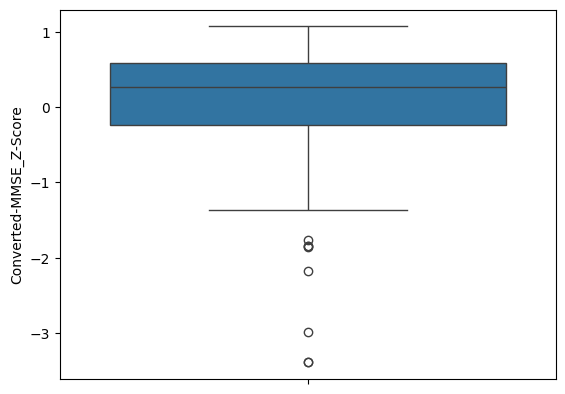

In [24]:
# Boxplot
sns.boxplot(data = results_df['Converted-MMSE_Z-Score'])

<Axes: ylabel='Converted-MMSE_Z-Score'>

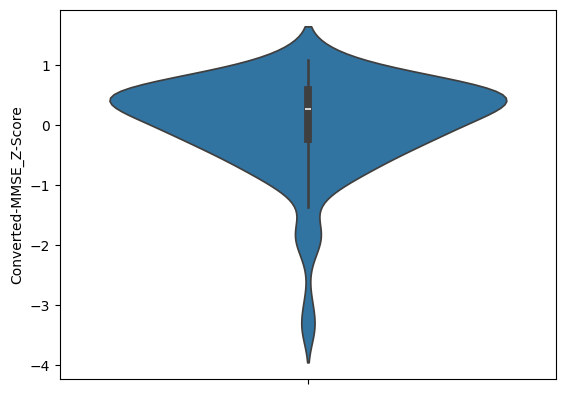

In [25]:
# Violinplot
sns.violinplot(data = results_df['Converted-MMSE_Z-Score'])

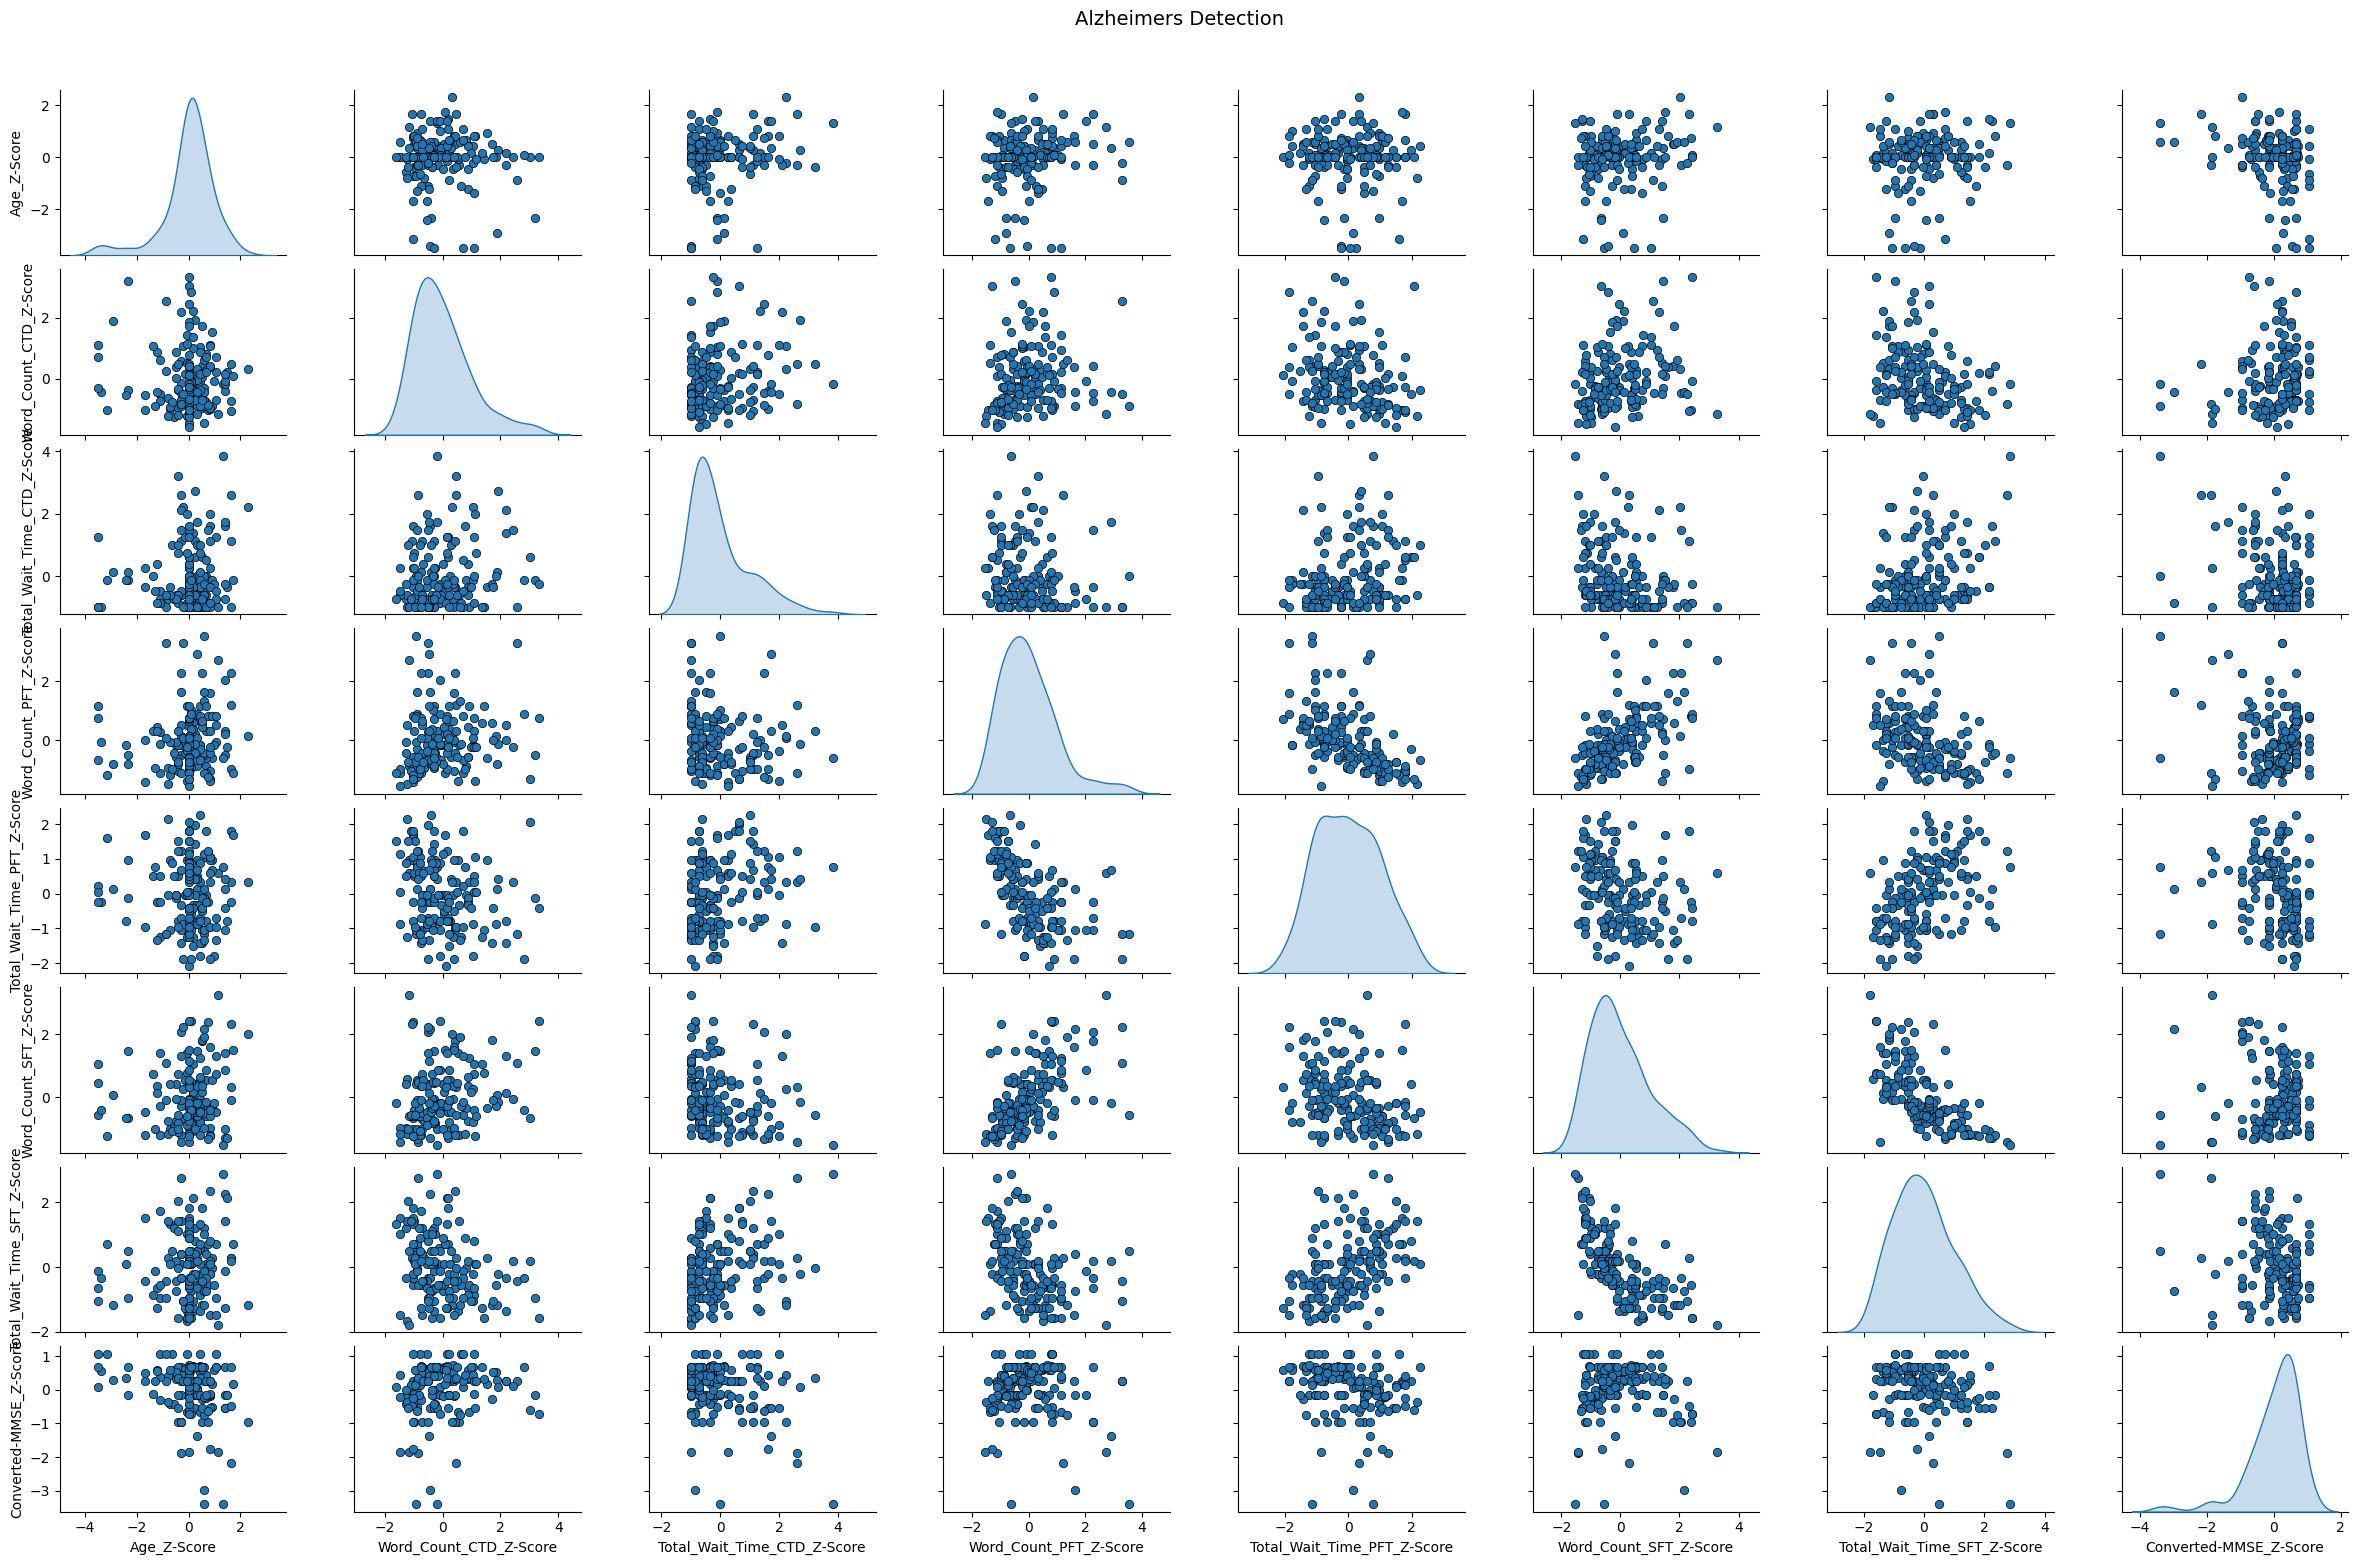

In [26]:
# Pair-wise Scatter Plots
pp = sns.pairplot(results_df, height = 2, aspect = 1.5, # set height of each facet to 2 inches and width to 2 * 1.5 inches
                  plot_kws = dict(edgecolor = "k", linewidth = .5), # change edges of points to thin black
                  diag_kind = "kde", diag_kws = dict(fill = True)) # set diagonal charts, kws = keyword arguments

fig = pp.fig
fig.subplots_adjust(top = .93, wspace = .3) # increase top space and white spaces between the plots
fig.suptitle('Alzheimers Detection', fontsize = 14); # add title to figure

In [27]:
# Save table with filled values
results_df.to_csv("Filled_mmse-Z-Score.csv", index = False)